### Pivot & Unstack Review and Final Homework (200 Points)

Your task in this homework is filling the cells where "your code here" sign appears. Its a cumulative work flow, I provided some code as well so just follow the stream until the last question which is 70 points and use your assumtions and insight for that.

Good luck!

### Unstack

DataFrame.unstack(level=-1, fill_value=None)

Pivot a level of the (necessarily hierarchical) index labels, returning a DataFrame having a new level of column labels whose inner-most level consists of the pivoted index labels. If the index is not a MultiIndex, the output will be a Series (the analogue of stack when the columns are not a MultiIndex). The level involved will automatically get sorted.

In [3]:
index = pd.MultiIndex.from_tuples([('one', 'a'), ('one', 'b'),
                                    ('two', 'a'), ('two', 'b')])
s = pd.Series(np.arange(1.0, 5.0), index=index)
s


NameError: name 'pd' is not defined

In [2]:
b=s.unstack()
b

NameError: name 's' is not defined

In [38]:
c=b.stack()
c

one  a    1.0
     b    2.0
two  a    3.0
     b    4.0
dtype: float64

In [27]:
df = pd.DataFrame({'month': [1, 4, 7, 10],
                    'year': [2012, 2014, 2013, 2014],
                    'sale':[55, 40, 84, 31]})

In [28]:
df.set_index(['month'])
#df.set_index(['year', 'month'])

,year,sale
month,,
1,2012,55
4,2014,40
7,2013,84
10,2014,31


In [33]:
a=df.unstack()
a

month  0       1
       1       4
       2       7
       3      10
year   0    2012
       1    2014
       2    2013
       3    2014
sale   0      55
       1      40
       2      84
       3      31
dtype: int64

### Pivot Tables

pandas.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html

Create a spreadsheet-style pivot table as a DataFrame. The levels in the pivot table will be stored in MultiIndex objects (hierarchical indexes) on the index and columns of the result DataFrame

In [41]:
df = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo",
                         "bar", "bar", "bar", "bar"],
                    "B": ["one", "one", "one", "two", "two",
                         "one", "one", "two", "two"],
                    "C": ["small", "large", "large", "small",
                         "small", "large", "small", "small",
                          "large"],
                   "D": [1, 2, 2, 3, 3, 4, 5, 6, 7]})

df

,A,B,C,D
0,foo,one,small,1
1,foo,one,large,2
2,foo,one,large,2
3,foo,two,small,3
4,foo,two,small,3
5,bar,one,large,4
6,bar,one,small,5
7,bar,two,small,6
8,bar,two,large,7


In [48]:
table = pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])
table

C        large  small
A   B                
bar one    4.0    5.0
    two    7.0    6.0
foo one    2.0    1.0
    two    NaN    3.0

In [49]:
table = pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'], aggfunc=np.sum)
table

C        large  small
A   B                
bar one    4.0    5.0
    two    7.0    6.0
foo one    4.0    1.0
    two    NaN    6.0

In [53]:
df = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo",
                         "bar", "bar", "bar", "bar"],
                    "B": ["one", "one", "one", "two", "two",
                         "one", "one", "two", "two"],
                    "C": ["small", "large", "large", "small",
                         "small", "large", "small", "small",
                          "large"],
                   "D": [1, 2, 2, 3, 3, 4, 5, 6, 7],
                  "E": [11, 21, 21, 33, 33, 44, 55, 66, 77]})



table = pd.pivot_table(df, values=['D', 'E'], index=['A', 'C'],
                   aggfunc={'D': np.mean,
                            'E': [min, max, np.median]})
table

D     E             
               mean   max median   min
A   C                                 
bar large  5.500000  77.0   60.5  44.0
    small  5.500000  66.0   60.5  55.0
foo large  2.000000  21.0   21.0  21.0
    small  2.333333  33.0   33.0  11.0

### Case from Social Security Names Catalog
#### Homework Starts Here

The Social Security data are available on multiple government websites, but I've also included them in the names.zip file in the exercise file directory. 

We need to uncompress that archive. We can do that with the Python zipfile module. So we import that, we create a zipfile object from the names.zip file and we extract its contents into the current directory.

That's just a dot. We'll use Python to look at the contents of the directory names. For that, we load the os module and use the listdir function. Very good, we see many files, presumably one for every year. Let's have a look at one. 

In [373]:
import numpy as np
import matplotlib.pyplot as pp
import pandas as pd
import seaborn
import warnings
warnings.filterwarnings('ignore')

In [374]:
%matplotlib inline

In [375]:
import zipfile
zipfile.ZipFile('names.zip').extractall('.')

In [376]:
import os
os.listdir('names')

['yob2000.txt',
 'yob2014.txt',
 'yob1938.txt',
 'yob1910.txt',
 'yob1904.txt',
 'yob1905.txt',
 'yob1911.txt',
 'yob1939.txt',
 'yob2001.txt',
 'yob2003.txt',
 'yob1907.txt',
 'yob1913.txt',
 'yob1898.txt',
 'yob1899.txt',
 'yob1912.txt',
 'yob1906.txt',
 'yob2002.txt',
 'yob2012.txt',
 'yob2006.txt',
 'yob1902.txt',
 'yob1916.txt',
 'yob1889.txt',
 'yob1888.txt',
 'yob1917.txt',
 'yob1903.txt',
 'yob2007.txt',
 'yob2013.txt',
 'yob2005.txt',
 'yob2011.txt',
 'yob1915.txt',
 'yob1901.txt',
 'yob1929.txt',
 'yob1928.txt',
 'yob1900.txt',
 'yob1914.txt',
 'yob2010.txt',
 'yob2004.txt',
 'yob1973.txt',
 'yob1967.txt',
 'yob1998.txt',
 'yob1999.txt',
 'yob1966.txt',
 'yob1972.txt',
 'yob1958.txt',
 'yob1964.txt',
 'yob1970.txt',
 'yob1971.txt',
 'yob1965.txt',
 'yob1959.txt',
 'yob1961.txt',
 'yob1975.txt',
 'yob1949.txt',
 'yob1948.txt',
 'yob1974.txt',
 'yob1960.txt',
 'yob1976.txt',
 'yob1962.txt',
 'yob1989.txt',
 'yob1988.txt',
 'yob1963.txt',
 'yob1977.txt',
 'yob1952.txt',
 'yob194

In [377]:
open('names/yob2011.txt','r').readlines()[:10]

['Sophia,F,21816\n',
 'Isabella,F,19870\n',
 'Emma,F,18777\n',
 'Olivia,F,17294\n',
 'Ava,F,15480\n',
 'Emily,F,14236\n',
 'Abigail,F,13229\n',
 'Madison,F,12360\n',
 'Mia,F,11512\n',
 'Chloe,F,10970\n']

In [378]:
names2011 = pd.read_csv('names/yob2011.txt')

In [379]:
names2011.head()

,Sophia,F,21816
0,Isabella,F,19870
1,Emma,F,18777
2,Olivia,F,17294
3,Ava,F,15480
4,Emily,F,14236


In [380]:
# Explicitly provide column names to your data and assign it to names2011
# your code is here (5 points)
names2011 = pd.read_csv('names/yob2011.txt',header=None)
names2011.columns=['name','sex','number']

In [381]:
names2011.head()

,name,sex,number
0,Sophia,F,21816
1,Isabella,F,19870
2,Emma,F,18777
3,Olivia,F,17294
4,Ava,F,15480


In [382]:
#Now we need to load all the tables for the years between 1880 and 2014. 
#While we do so, we will add a column year to each table so that the records 
#for the same name but different years will not be confused. 
#We"ll collect all these tables in a names_all list. 
#Let's then loop over years from 1880 to 2014, 
#so we'll extend the range to 2014+1. 
#We'll append the list, the result of reading a comma-separated file.


path='names'
list_names=os.listdir(path)
names_all=[]
numbers=[f[3:-4] for f in list_names if f.endswith('.txt')]
allyears=pd.DataFrame()
for i in range(1880,2014):
    if int(i)>=1880 and int(i)<2014:
        ii=pd.read_csv(f'{path}/yob{i}.txt',header=None)
        ii.columns=['name','sex','number']
        ii['year']=i
        names_all.append(ii)
ext=pd.read_csv(f'{path}/yob2014.txt',header=None)
ext.columns=['name','sex','number']
ext['year']=2014
names_all.append(ext)
allyears=pd.concat(names_all)
# 5 Points

In [383]:
allyears.head()

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [384]:
allyears.tail()

,name,sex,number,year
33039,Zykeem,M,5,2014
33040,Zymeer,M,5,2014
33041,Zymiere,M,5,2014
33042,Zyran,M,5,2014
33043,Zyrin,M,5,2014


We need to rework this data in a way that will let us look at the changing popularity of a given name. We will do this using Panda's MulitIndexes. We will index the data on gender first, then name, then year. So we build a new DataFrame where we set the index using sex first, then name, then year. We will also sort the index.

In [385]:
# your code is here 5 Points
allyears_cp=allyears.copy()
allyears_indexed=allyears_cp.set_index(['sex','name','year'])
allyears_indexed=allyears_indexed.sort_index()

In [386]:
allyears_indexed

number
sex name      year        
F   Aabha     2011       7
              2012       5
              2014       9
    Aabriella 2008       5
              2014       5
...                    ...
M   Zytavious 2009       7
              2010       6
    Zyvion    2009       5
    Zyyon     2014       6
    Zzyzx     2010       5

[1825433 rows x 1 columns]

Remember, We use the special indexing attributes loc and iloc to select rows respectively by the value of the index or by the number of the row. Loc also lets us select any combination of fields for a MultiIndex. iloc also lets but since its a strict position indexer, it does not regard the structure at all, only the first actual behavior (inner/outer level indexing position is confusing). Please create we want a table of Marys across years by using Loc.

In [387]:
#your code is here 10 Points
allyears_indexed.loc[('F','Mary'),:]

,number
year,
1880,7065
1881,6919
1882,8148
1883,8012
1884,9217
...,...
2010,2862
2011,2701
2012,2565


What if we want to plot the popularity of a name? So let's write a function that does just that. This takes the sex and a name, selects the appropriate rows in the DataFrame, and then plots the values of this subset of data against the index, which, in this case, would be just the years. Let's try it out.

In [388]:
def plotname(sex,name):
    #your code is here
    lll=allyears_indexed.loc[(sex,name),:]
    pp.plot(lll)

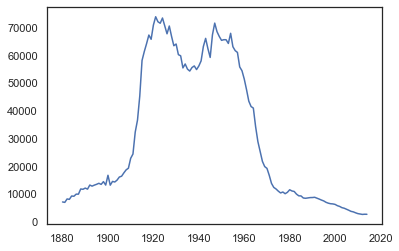

In [389]:
plotname('F','Mary')

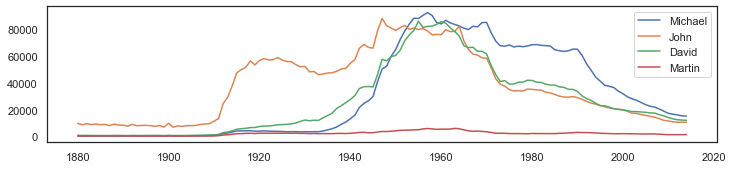

In [390]:
pp.figure(figsize=(12,2.5))
# 10 Points
# now plot the popularity of Michael, John, David, Martin altogether in a plot
seaborn.set_style('white')
plotname('M','Michael')
plotname('M','John')
plotname('M','David')
plotname('M','Martin')
pp.legend(['Michael','John','David','Martin'])

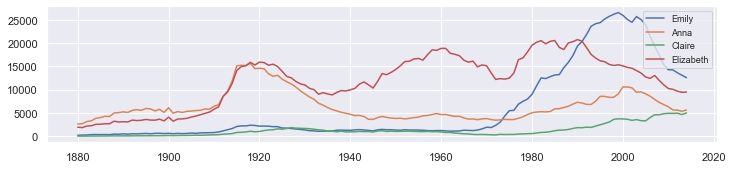

In [391]:
pp.figure(figsize=(12,2.5))

names = ['Emily','Anna','Claire','Elizabeth']

# your code is here 5 Points
seaborn.set()
plotname('F','Emily')
plotname('F','Anna')
plotname('F','Claire')
plotname('F','Elizabeth')
pp.legend(names,loc='upper right',fontsize=9)


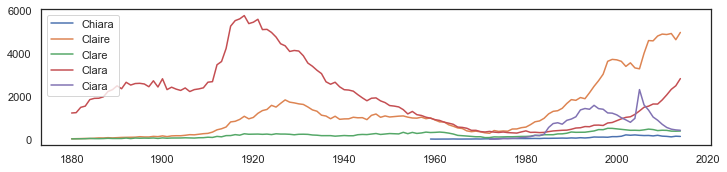

In [392]:
pp.figure(figsize=(12,2.5))

names = ['Chiara','Claire','Clare','Clara','Ciara']

#your code is here 5 Points
seaborn.set_style('white')
for i in names:
    plotname("F",i)
pp.legend(names,loc='upper left',fontsize=11)


With a little more work, we can visualize this plot as a cumulative plot, also known as a stacked line chart. We wish to plot the frequency of each variant on top of the other ones, so that the overall height of the graph will track the total number of variants. For this in matplotlib, we can use the stackplot command. First, however, we will have to slightly change the shape of the table. First of all, we select down in to subtable that contains only the variants.

In [393]:
#we need females and we need the variants of Claire's
# 10 Points
variants=allyears_indexed.copy()
variants=variants.loc['F'].loc[names]
variants

number
name   year        
Chiara 1959       9
       1960       5
       1962       8
       1963       8
       1964      12
...             ...
Ciara  2010     698
       2011     550
       2012     471
       2013     435
       2014     418

[502 rows x 1 columns]

In [394]:
# promote the names from index value to column names
variants=variants.unstack('name')
variants
# 10 Points

number                              
name Chiara  Claire  Clare   Clara  Ciara
year                                     
1880    NaN    21.0   15.0  1226.0    NaN
1881    NaN    23.0   20.0  1242.0    NaN
1882    NaN    30.0   21.0  1490.0    NaN
1883    NaN    38.0   22.0  1548.0    NaN
1884    NaN    33.0   38.0  1852.0    NaN
...     ...     ...    ...     ...    ...
2010  145.0  4914.0  420.0  1836.0  698.0
2011  133.0  4893.0  414.0  2072.0  550.0
2012  111.0  4941.0  379.0  2331.0  471.0
2013  141.0  4651.0  376.0  2499.0  435.0
2014  131.0  4991.0  383.0  2833.0  418.0

[135 rows x 5 columns]

In [395]:
#fill the missing values with O
variants.fillna(0)
# 5 Points

number                              
name Chiara  Claire  Clare   Clara  Ciara
year                                     
1880    0.0    21.0   15.0  1226.0    0.0
1881    0.0    23.0   20.0  1242.0    0.0
1882    0.0    30.0   21.0  1490.0    0.0
1883    0.0    38.0   22.0  1548.0    0.0
1884    0.0    33.0   38.0  1852.0    0.0
...     ...     ...    ...     ...    ...
2010  145.0  4914.0  420.0  1836.0  698.0
2011  133.0  4893.0  414.0  2072.0  550.0
2012  111.0  4941.0  379.0  2331.0  471.0
2013  141.0  4651.0  376.0  2499.0  435.0
2014  131.0  4991.0  383.0  2833.0  418.0

[135 rows x 5 columns]

In [396]:
variants = allyears_indexed.loc['F'].loc[names].unstack(level=0).fillna(0)

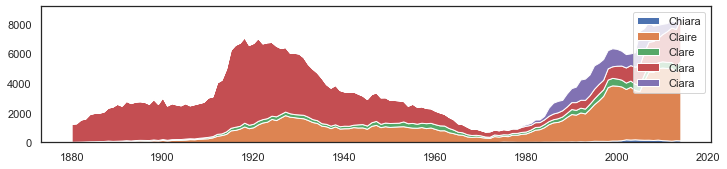

In [397]:
pp.figure(figsize=(12,2.5))

pp.stackplot(variants.index,variants.values.T,labels=names)
pp.legend(names)

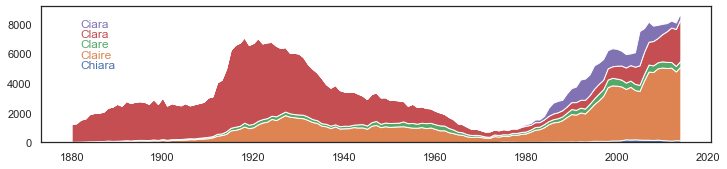

In [398]:
pp.figure(figsize=(12,2.5))

palette = seaborn.color_palette()
pp.stackplot(variants.index,variants.values.T,colors=palette)

for i,name in enumerate(names):
    pp.text(1882,5000+700*i,name,color=palette[i])

Next we'd like to extract the ten most popular male names in any given year.

In [399]:
# your code will print out the dataframe below male names in 2008 with values
# 10 Points
pop1=pd.pivot_table(allyears_indexed,values=['number'],index=['sex','name','year'],aggfunc={'number':np.sum})
pop2008=pop1.loc['M',:,2008]
pop2008=pop2008.nlargest(10,['number'])
pop2008

number
sex name        year        
M   Jacob       2008   22568
    Michael     2008   20590
    Ethan       2008   20196
    Joshua      2008   19186
    Daniel      2008   18985
    Alexander   2008   18679
    William     2008   18380
    Anthony     2008   18378
    Christopher 2008   17928
    Matthew     2008   17573

In [400]:
#pop2008 = your code above
# 5 points
pop2008.reset_index().drop(['sex','year','number'],axis=1).head()

,name
0,Jacob
1,Michael
2,Ethan
3,Joshua
4,Daniel


In [401]:
pop2008.reset_index().drop(['sex','year','number'],axis=1).head()

,name
0,Jacob
1,Michael
2,Ethan
3,Joshua
4,Daniel


In [402]:
#write a function to find top ten male names in a given year
pop2=pd.pivot_table(allyears_indexed,values=['number'],index=['sex','name','year'],aggfunc={'number':np.sum})
def topten(sex, year):
    mm=pop2.loc[sex,:,year]
    df_max=mm.nlargest(10,['number'])
    df_max=df_max.reset_index().drop(['sex','year','number'],axis=1)
    display(df_max)
# 15 Points

In [403]:
topten('M',2009)

,name
0,Jacob
1,Ethan
2,Michael
3,Alexander
4,William
5,Joshua
6,Daniel
7,Jayden
8,Noah
9,Christopher


In [404]:
#Write a function to print top ten male and female names for a given range of years 
pe=pd.DataFrame()
p1=pd.DataFrame()

def toptens(sex,int1,int2):
    for i in range(int1,(int2+1)):
        pe=allyears_indexed.loc[sex,:,i].sort_values(by='number', ascending=False)
        pe=pe.reset_index()
        pe=pe.drop(['sex','year','number'],axis=1).head(10)
        pe.columns=[i]
        if(i==int1):
            p1=pe
        else:
            p1=pd.concat([p1,pe],axis=1)
    return p1
# 15 Points

In [405]:
toptens('M',2000,2010)

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob
1,Michael,Michael,Michael,Michael,Michael,Michael,Michael,Michael,Michael,Ethan,Ethan
2,Matthew,Matthew,Joshua,Joshua,Joshua,Joshua,Joshua,Ethan,Ethan,Michael,Michael
3,Joshua,Joshua,Matthew,Matthew,Matthew,Matthew,Ethan,Joshua,Joshua,Alexander,Jayden
4,Christopher,Christopher,Ethan,Andrew,Ethan,Ethan,Matthew,Daniel,Daniel,William,William
5,Nicholas,Nicholas,Andrew,Ethan,Andrew,Andrew,Daniel,Christopher,Alexander,Joshua,Alexander
6,Andrew,Andrew,Joseph,Joseph,Daniel,Daniel,Andrew,Anthony,William,Daniel,Noah
7,Joseph,Joseph,Christopher,Daniel,William,Anthony,Christopher,William,Anthony,Jayden,Daniel
8,Daniel,Daniel,Nicholas,Christopher,Joseph,Joseph,Anthony,Matthew,Christopher,Noah,Aiden
9,Tyler,William,Daniel,Anthony,Christopher,Christopher,William,Andrew,Matthew,Christopher,Anthony


In [406]:
toptens('F',1985,1995)

,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995
0,Jessica,Jessica,Jessica,Jessica,Jessica,Jessica,Ashley,Ashley,Jessica,Jessica,Jessica
1,Ashley,Ashley,Ashley,Ashley,Ashley,Ashley,Jessica,Jessica,Ashley,Ashley,Ashley
2,Jennifer,Amanda,Amanda,Amanda,Brittany,Brittany,Brittany,Amanda,Sarah,Emily,Emily
3,Amanda,Jennifer,Jennifer,Sarah,Amanda,Amanda,Amanda,Brittany,Samantha,Samantha,Samantha
4,Sarah,Sarah,Sarah,Jennifer,Sarah,Samantha,Samantha,Sarah,Emily,Sarah,Sarah
5,Stephanie,Stephanie,Stephanie,Brittany,Samantha,Sarah,Sarah,Samantha,Brittany,Taylor,Taylor
6,Nicole,Nicole,Brittany,Stephanie,Jennifer,Stephanie,Stephanie,Emily,Taylor,Brittany,Hannah
7,Heather,Brittany,Nicole,Samantha,Stephanie,Jennifer,Jennifer,Stephanie,Amanda,Amanda,Brittany
8,Elizabeth,Heather,Heather,Nicole,Lauren,Elizabeth,Elizabeth,Elizabeth,Elizabeth,Elizabeth,Amanda
9,Megan,Elizabeth,Elizabeth,Elizabeth,Elizabeth,Lauren,Emily,Megan,Stephanie,Megan,Elizabeth


In [407]:
toptens('F',1985,1995).stack().head()

0  1985    Jessica
   1986    Jessica
   1987    Jessica
   1988    Jessica
   1989    Jessica
dtype: object

In [408]:
toptens('F',1985,1995).stack().value_counts()

Jessica      11
Amanda       11
Ashley       11
Sarah        11
Elizabeth    11
Brittany     10
Stephanie     9
Samantha      8
Jennifer      7
Emily         5
Nicole        4
Heather       3
Taylor        3
Megan         3
Lauren        2
Hannah        1
dtype: int64

In [409]:
popular = toptens('F',1985,1995).stack().value_counts().index[:6]

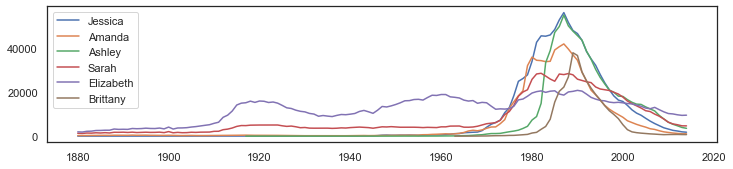

In [410]:
pp.figure(figsize=(12,2.5))

for name in popular:
    plotname('F',name)
    
pp.legend(popular)

We see that most of the names that were popular between 1985 and 1995 were relatively short lived. Only Elizabeth can be considered a classic.

### Exercise
Our task is to identify name fads. That is, popular names that appear suddenly and then fade away quickly.

Let us look at this plot for the popularity of the top six girl names between 1985 and 1995. Most of these names were only popular for a relatively short period. This prompts the question of how we can identify a name fad. A fad will have a certain spikiness to the plot, more like Britney here than Elizabeth. What we need to do is to compute a single number for each name that will tell us how spiky the plot will be.

However the number should be insensitive to the total number of appearances for a given name. After all, a small, not very popular fad is still a fad. It turns out that the trick to computing the spikiness will be to sum the squares of the frequencies of the names. It is a mathematical fact that if you multiply a function by itself, this increases it's contrast, if you wish, it's spikiness. Let's start by computing the total number of babies with a given name over all years. For this, we will use the groupby function, grouping by sex and name, and then sum all the values in each group.

In [411]:
allyears.groupby(['sex','name']).sum().head()

number   year
sex name                    
F   Aabha          21   6037
    Aabriella      10   4022
    Aaden           5   2009
    Aadhira        29   6039
    Aadhya        639  16084

In [412]:
allyears.groupby(['sex','name'])['number'].sum().head()

sex  name     
F    Aabha         21
     Aabriella     10
     Aaden          5
     Aadhira       29
     Aadhya       639
Name: number, dtype: int64

In [413]:
totals = allyears.groupby(['sex','name'])['number'].sum()

The aggregation function sum is not quite what we need. We need to sum the squares. Pandas doesn't have a function for that, but we can define it ourselves, so let's do that. Define sum S Q of X to return the sum of X squared. Let's compute the spikiness by repeating the groupby operation, selecting number, applying sum square, using the pandas function, ag, for aggregation.

Last, we want to divide by the totals. Doing that we put very popular and less popular names on uneven footing. We call this spikiness. Let's have a look. Indeed, the spikiness is a number between zero and one which happens when a name appears only in a single year. I will select only the names that appear relatively frequently, by requesting the totals be greater than 5000.

In [414]:
def sumsq(x):
    return sum(x**2)

In [415]:
spikyness = allyears.groupby(['sex','name'])['number'].agg(sumsq) / totals**2

In [416]:
spikyness.head()

sex  name     
F    Aabha        0.351474
     Aabriella    0.500000
     Aaden        1.000000
     Aadhira      0.362663
     Aadhya       0.262673
Name: number, dtype: float64

In [417]:
spiky_common = spikyness[totals > 5000].copy()
spiky_common=spiky_common.sort_values(ascending=False)
spiky_common.head(10)

sex  name     
M    Iker         0.199368
     Shaquille    0.195689
     Jase         0.182165
F    Adalynn      0.177107
     Harper       0.164827
M    Brantley     0.160532
F    Arya         0.159564
M    Bentley      0.159259
F    Miley        0.145886
     Paisley      0.144966
Name: number, dtype: float64

In [418]:
spiky_common.tail(5)

sex  name  
F    Rosa      0.008512
     Mollie    0.008437
M    Ike       0.008310
F    Delia     0.008263
     Louisa    0.007931
Name: number, dtype: float64

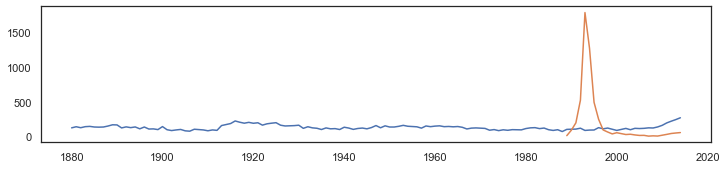

In [419]:
pp.figure(figsize=(12,2.5))

plotname('F','Louisa')
plotname('M','Shaquille')

In [420]:
fads = spiky_common.head(10).index.values

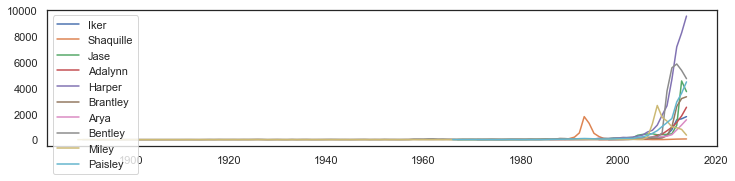

In [421]:
pp.figure(figsize=(12,2.5))

for sex,name in fads:
    plotname(sex,name)

pp.legend([name for sex,name in fads],loc='upper left')

The problem here is that most of these names are popular now, so we don't know whether they are fads just yet. They may have staying power. What we can do is to add another cut to the data that excludes names popular in the last ten years. For that, we'll need to compute totals over the last thirteen years.

In [422]:
#calculate totals_recent which is after 2005 grouped by sex and name and agg function sum
from2005=allyears[allyears['year']>2005]
totals_recent=from2005.groupby(['sex','name'])['number'].sum()
# 15 Points

In [423]:
spiky_common = spikyness[(totals > 5000) & (totals_recent < 1000)].copy()
spiky_common.sort_values(ascending=False)
spiky_common.head(10)

sex  name    
F    Adell       0.016777
     Adella      0.012111
     Adria       0.016512
     Adriane     0.022747
     Adrianne    0.017954
     Agatha      0.012167
     Agnes       0.017479
     Alba        0.012251
     Alberta     0.016689
     Alecia      0.018620
Name: number, dtype: float64

In [424]:
fads = spiky_common.head(10).index.values

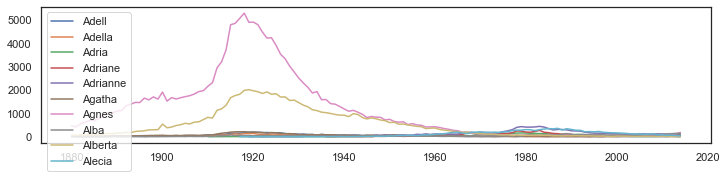

In [425]:
pp.figure(figsize=(12,2.5))

for sex,name in fads:
    plotname(sex,name)

pp.legend([name for sex,name in fads],loc='upper left')

### Final Question (70 Points)
For every name, compute the total number of times that the name was used for boys, and the total number of times that it was used for girls. Then, identify unisex names where the ratio between the boys total and the girls total is less than four either way. Last, plot the popularity of the top 10 unisex names. 

In [426]:
display(totals)
totals=totals.reset_index()

sex  name     
F    Aabha         21
     Aabriella     10
     Aaden          5
     Aadhira       29
     Aadhya       639
                 ... 
M    Zytavion       5
     Zytavious     43
     Zyvion         5
     Zyyon          6
     Zzyzx          5
Name: number, Length: 104110, dtype: int64

In [427]:
table = pd.pivot_table(totals, values='number', index=['name'], columns=['sex'])
table=table.dropna()
table

sex,F,M
name,,
Aaden,5.0,3915.0
Aadi,16.0,667.0
Aadyn,16.0,387.0
Aalijah,107.0,155.0
Aaliyah,69833.0,84.0
...,...,...
Zyian,49.0,35.0
Zyien,12.0,48.0
Zyion,131.0,629.0


In [428]:
table['ratioMF']=table['M']/table['F']
table['ratioFM']=table['F']/table['M']

In [429]:
unisexName=table[table['ratioMF']<4 ]
unisexName=unisexName[unisexName['ratioFM']<4]
unisexName

sex,F,M,ratioMF,ratioFM
name,,,,
Aalijah,107.0,155.0,1.448598,0.690323
Aamari,67.0,88.0,1.313433,0.761364
Aaren,282.0,717.0,2.542553,0.393305
Aareon,10.0,33.0,3.300000,0.303030
Aarian,40.0,76.0,1.900000,0.526316
...,...,...,...,...
Zyaire,432.0,1573.0,3.641204,0.274634
Zyan,251.0,679.0,2.705179,0.369661
Zyian,49.0,35.0,0.714286,1.400000


In [430]:
unisexName['total']=unisexName['F']+unisexName['M']
unisexName=unisexName.sort_values(by='total',ascending=False)
unisexName.head(10)

sex,F,M,ratioMF,ratioFM,total
name,,,,,
Willie,146129.0,447759.0,3.064135,0.326356,593888.0
Jordan,126910.0,352524.0,2.777748,0.360004,479434.0
Taylor,308130.0,107966.0,0.350391,2.853954,416096.0
Leslie,264054.0,112533.0,0.426174,2.346458,376587.0
Jamie,265838.0,84424.0,0.317577,3.148844,350262.0
Angel,91734.0,209691.0,2.285859,0.437472,301425.0
Lee,62037.0,229654.0,3.701888,0.270132,291691.0
Jessie,165614.0,109317.0,0.660071,1.514989,274931.0
Marion,187796.0,71753.0,0.382079,2.617256,259549.0


Text(0, 0.5, 'Popularity')

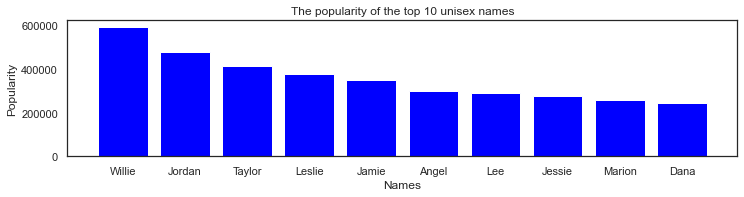

In [435]:
unisexPlot=unisexName.drop(['F','M','ratioMF','ratioFM'],axis=1).head(10)
unisexPlot=unisexPlot.reset_index()
pp.figure(figsize=(12,2.5))
pp.bar(unisexPlot['name'], unisexPlot['total'], color ='blue',width = 0.8)
pp.title('The popularity of the top 10 unisex names')
pp.xlabel('Names')
pp.ylabel('Popularity')